# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
temperature = []
humidity = []
cloudiness = []
wind_speed = []
longitudes = []
latitudes = []
city_list = []
country = []
count = 1
for city in cities:
    params = {
        'appid': weather_api_key,
        'q':city,
        'units': 'imperial'
    }
    url = f'http://api.openweathermap.org/data/2.5/weather'
    response = requests.get(url, params=params).json()

    try:
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        longitudes.append(response['coord']['lon'])
        latitudes.append(response['coord']['lat'])        
        print(f'Processing record {count}: {city}')
        city_list.append(city)
        country.append(response['sys']['country'])
        count+=1
        
    except KeyError:
        print(f'City:{city} is not found. Skipping... ')
        
print(f'Data retrival complete!')

Processing record 1: hilo
Processing record 2: arraial do cabo
Processing record 3: vaini
Processing record 4: coahuayana
Processing record 5: thohoyandou
Processing record 6: caravelas
City:palabuhanratu is not found. Skipping... 
Processing record 7: gushikawa
Processing record 8: samarai
Processing record 9: new norfolk
Processing record 10: jamestown
Processing record 11: tartus
Processing record 12: miandrivazo
Processing record 13: liepaja
Processing record 14: hamilton
Processing record 15: mayo
Processing record 16: esperance
Processing record 17: chiredzi
Processing record 18: bonthe
Processing record 19: klaksvik
Processing record 20: hermanus
Processing record 21: nioro
Processing record 22: ushuaia
Processing record 23: longyearbyen
Processing record 24: puerto del rosario
Processing record 25: atuona
Processing record 26: lingao
Processing record 27: yumen
Processing record 28: thompson
Processing record 29: ishigaki
Processing record 30: bluff
Processing record 31: noyabr

Processing record 230: bontang
City:bur gabo is not found. Skipping... 
Processing record 231: wynyard
Processing record 232: ust-ilimsk
Processing record 233: elk plain
Processing record 234: buala
Processing record 235: buta
Processing record 236: alta floresta
Processing record 237: mehamn
Processing record 238: auki
Processing record 239: igrim
Processing record 240: victoria
Processing record 241: poso
Processing record 242: leningradskiy
Processing record 243: loreto
Processing record 244: bubaque
Processing record 245: touros
Processing record 246: bathsheba
Processing record 247: vila franca do campo
Processing record 248: ballina
Processing record 249: batagay-alyta
Processing record 250: trincomalee
Processing record 251: qaanaaq
Processing record 252: clyde river
Processing record 253: fenton
Processing record 254: santiago
Processing record 255: bairiki
Processing record 256: ilhabela
Processing record 257: kuandian
Processing record 258: iberia
Processing record 259: north

Processing record 451: zhigansk
Processing record 452: nizwa
City:utiroa is not found. Skipping... 
Processing record 453: manta
Processing record 454: portland
Processing record 455: tukrah
Processing record 456: hay river
Processing record 457: melipilla
Processing record 458: katsuura
Processing record 459: san ignacio
Processing record 460: pueblo nuevo
Processing record 461: pergamino
Processing record 462: amahai
Processing record 463: muros
Processing record 464: waynesville
Processing record 465: praya
Processing record 466: moyo
City:krasnoyarsk-66 is not found. Skipping... 
Processing record 467: semporna
Processing record 468: morogoro
Processing record 469: ketchikan
Processing record 470: boddam
Processing record 471: kungurtug
Processing record 472: roanoke rapids
Processing record 473: pafos
Processing record 474: huai yot
Processing record 475: the valley
Processing record 476: yabrud
City:tumannyy is not found. Skipping... 
Processing record 477: bambanglipuro
City:gur

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({
    'City_Name': city_list,
    'country':country,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Temperature/F': temperature,
    'Humidity/%': humidity,
    'Cloudiness/%':cloudiness,
    'Wind_Speed/mph':wind_speed
})
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City_Name,country,Latitude,Longitude,Temperature/F,Humidity/%,Cloudiness/%,Wind_Speed/mph
0,hilo,US,19.73,-155.09,78.80,61,40,11.41
1,arraial do cabo,BR,-22.97,-42.03,77.00,73,40,8.05
2,vaini,TO,-21.20,-175.20,82.40,65,20,18.34
3,coahuayana,MX,18.73,-103.68,89.60,40,40,3.40
4,thohoyandou,ZA,-22.95,30.48,66.06,87,100,4.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

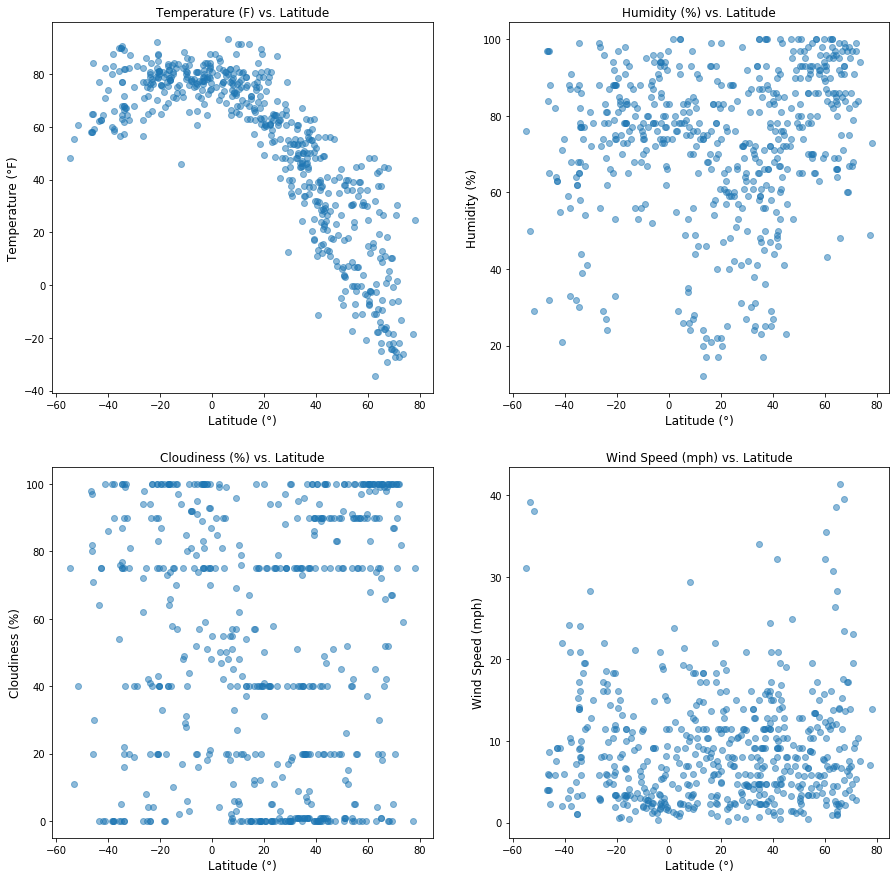

In [6]:
# Making scatter plots

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(weather_df.Latitude, weather_df['Temperature/F'], alpha=0.5)
plt.title('Temperature (F) vs. Latitude', size=12)
plt.xlabel('Latitude (°)', size=12)
plt.ylabel('Temperature (°F)', size=12)

plt.subplot(222)
plt.scatter(weather_df.Latitude, weather_df['Humidity/%'], alpha=0.5)
plt.title('Humidity (%) vs. Latitude', size=12)
plt.xlabel('Latitude (°)', size=12)
plt.ylabel('Humidity (%)', size=12)

plt.subplot(223)
plt.scatter(weather_df.Latitude, weather_df['Cloudiness/%'], alpha=0.5)
plt.title('Cloudiness (%) vs. Latitude', size=12)
plt.xlabel('Latitude (°)', size=12)
plt.ylabel('Cloudiness (%)', size=12)

plt.subplot(224)
plt.scatter(weather_df.Latitude, weather_df['Wind_Speed/mph'], alpha=0.5)
plt.title('Wind Speed (mph) vs. Latitude', size=12)
plt.xlabel('Latitude (°)', size=12)
plt.ylabel('Wind Speed (mph)', size=12)
plt.savefig("output_data/global.png")
plt.show()

## Linear Regression

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df.Latitude >= 0]
southern_df = weather_df.loc[weather_df.Latitude < 0]

Northern Hemisphere Temperature/F:R Square=0.7608282380207089
Northern Hemisphere Humidity/%:R Square=0.11942899762863561
Northern Hemisphere Cloudiness/%:R Square=0.07985792128130635
Northern Hemisphere Wind_Speed/mph:R Square=0.007775396722777748
Southern Hemisphere Temperature/F:R Square=0.15310802410401775
Southern Hemisphere Humidity/%:R Square=0.09849431286576754
Southern Hemisphere Cloudiness/%:R Square=0.0400642837049468
Southern Hemisphere Wind_Speed/mph:R Square=0.1288760668855931


C:\Users\zhan3\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


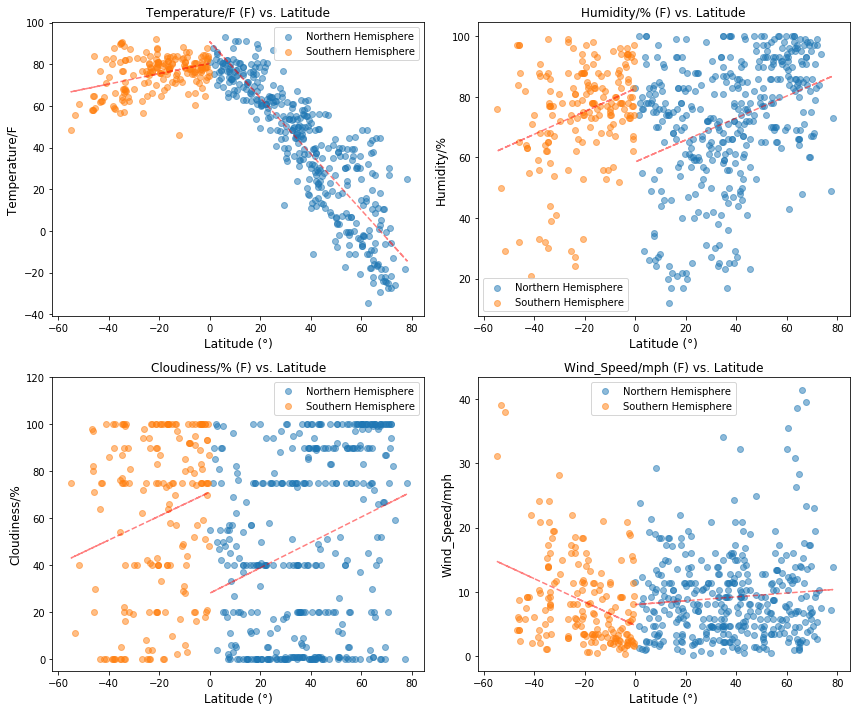

In [12]:
# Set up some name list for proper labeling during plotting figures within for loop below.
df_list = [northern_df, southern_df]
column_list = ['Temperature/F','Humidity/%', 'Cloudiness/%','Wind_Speed/mph']
label_list = ['Northern Hemisphere', 'Southern Hemisphere']

plt.figure(figsize=(12,10))
for i in range(len(label_list)):
    for j in range(len(column_list)):
        
# Performing linear regression.
        (slope, intercept, rvalue, pvalue, stderr) = linregress(df_list[i].Latitude, df_list[i][column_list[j]])
        reg_value = slope*df_list[i].Latitude + intercept
        
# Creating subplots        
        plt.subplot(2,2,j+1)
# Plotting real data vs fitted data:
        plt.scatter(df_list[i].Latitude, df_list[i][column_list[j]], alpha=0.5, label=label_list[i])
        plt.plot(df_list[i].Latitude, reg_value, 'r--', alpha=0.5)
        
        plt.title(f'{column_list[j]} (F) vs. Latitude', size=12)
        plt.xlabel('Latitude (°)', size=12)
        plt.ylabel(f'{column_list[j]}', size=12)
        
# Display subplot#3 legend at a better location    
        if j == 2:
            plt.ylim(-5,120)
        plt.legend(loc='best')
        print(f'{label_list[i]} {column_list[j]}:R Square={rvalue**2}')
plt.tight_layout()
plt.savefig("output_data/Northern-Southern.png")
plt.show()